In [1]:
import csv
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model

In [2]:
def rolling_average(column,n):
    average_data = []
    for i in range(len(column)):
        avg = np.average(column[i:i+n])
        average_data.append(avg)

        
average_data = []
for i in range(len(cars_2019['Vehicle Count'])):
    avg = np.average(cars_2019['Vehicle Count'][i:i+7])
    average_data.append(avg)

NameError: name 'cars_2019' is not defined

In [3]:
file_folder = '/Users/rosleeb/ny_thruway'
data_2019 = pd.read_csv(f'{file_folder}/ny_thruway_data_2019.csv')
data_2020 = pd.read_csv(f'{file_folder}/ny_car_data_2020.csv')
eia_gas_demand = pd.read_csv(f'{file_folder}/eia_gas_demand.csv')

In [4]:
data_2020

,Date,Entrance,Exit,Interval Beginning Time,Vehicle Class,Vehicle Count,Payment Type
0,01/02/2020,15,17,0,2H,4,E-ZPass
1,01/02/2020,15,17,0,2L,13,CASH
2,01/02/2020,15,17,0,2L,61,E-ZPass
3,01/02/2020,15,17,0,3H,1,E-ZPass
4,01/02/2020,15,17,0,4H,1,E-ZPass
...,...,...,...,...,...,...,...
6384434,05/24/2020,B3,B2,19,2L,10,E-ZPass
6384435,05/24/2020,B3,B2,20,2L,8,E-ZPass
6384436,05/24/2020,B3,B2,21,2L,9,E-ZPass
6384437,05/24/2020,B3,B2,22,2L,5,E-ZPass


/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


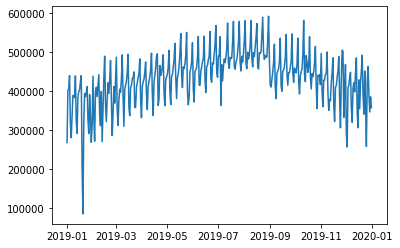

In [5]:
ny_cars_2019 = data_2019[['Date', 'Vehicle Count']]
ny_cars_2019['Vehicle Count'] = ny_cars_2019['Vehicle Count'].astype(str).astype(int)
ny_cars_2019['Date'] = pd.to_datetime(ny_cars_2019['Date'])
cars_2019 = ny_cars_2019.groupby(['Date']).sum()

plt.plot(cars_2019)
plt.show()

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


Text(0.5, 1.0, '2020 NY Cars on Road')

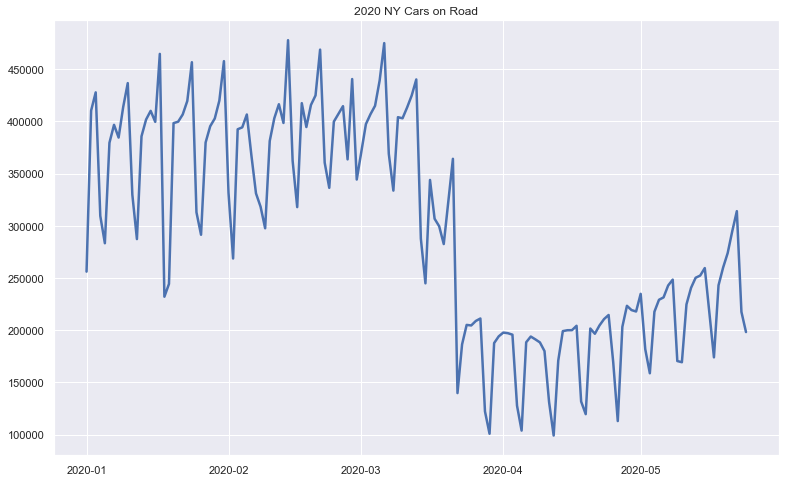

In [6]:
ny_cars_2020 = data_2020[['Date', 'Vehicle Count']]
ny_cars_2020['Vehicle Count'] = ny_cars_2020['Vehicle Count'].astype(str).astype(int)
ny_cars_2020['Date'] = pd.to_datetime(ny_cars_2020['Date'])
cars_2020 = ny_cars_2020.groupby(['Date']).sum()
#cars_2020 = cars_2020.rename(columns={'date': 'Date','vehicle_count': 'Vehicle Count'})

cars_2020.head()
#plt.plot(cars_2020)
#plt.show()

plt.figure(figsize=(13, 8))
sns.set(style="darkgrid")
sns.lineplot(data=cars_2020['Vehicle Count'], palette="tab10", linewidth=2.5).set_title("2020 NY Cars on Road")


In [7]:
average_2019 = []
for i in range(len(cars_2019['Vehicle Count'])):
    avg = np.average(cars_2019['Vehicle Count'][i:i+7])
    average_2019.append(avg)

cars_2019 = cars_2019.assign(avg = average_2019)

average_2020 = []
for i in range(len(cars_2020['Vehicle Count'])):
    avg = np.average(cars_2020['Vehicle Count'][i:i+7])
    average_2020.append(avg)
    
cars_2020 = cars_2020.assign(avg = average_2020)

Text(0.5, 1.0, 'NY Cars on Road')

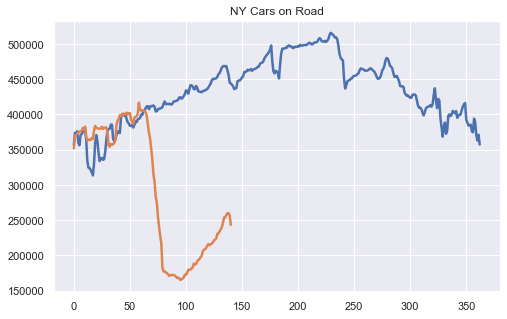

In [11]:
#plt.plot(average_2019)
#plt.plot(average_2020)
#plt.show()

plt.figure(figsize=(8, 5))
sns.set(style="darkgrid")
sns.lineplot(data=np.array(average_2019), palette="tab10", linewidth=2.5).set_title("NY Cars on Road")
sns.lineplot(data=np.array(average_2020[:141]), palette="tab10", linewidth=2.5).set_title("NY Cars on Road")

In [12]:
yoy_change = (np.array(average_2020[:143])-np.array(average_2019[:143]))/np.array(average_2019[:143])

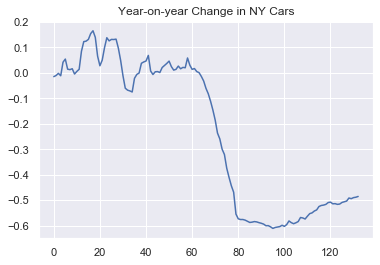

In [13]:
plt.plot(yoy_change[:133])
plt.title("Year-on-year Change in NY Cars")
plt.show()

In [14]:
cars_on_road = cars_2019
cars_on_road = cars_on_road.append(cars_2020)

In [15]:
eia_gas_demand

,Date,Gasoline Demand
0,1/4/19,8735
1,1/11/19,8565
2,1/18/19,8868
3,1/25/19,9564
4,2/1/19,9073
...,...,...
67,4/17/20,5311
68,4/24/20,5860
69,5/1/20,6664
70,5/8/20,7398


In [16]:
cars_eia = []
for i in range(71):
    cars_eia.append(cars_on_road['avg'][i*7].astype(float))
cars_eia.append(cars_on_road['avg'][-1:][0])

In [17]:
cars_matrix = eia_gas_demand.assign(cars = cars_eia)

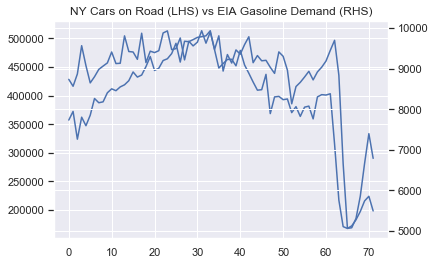

In [18]:
fig, ax1 = plt.subplots()

ax1.plot(cars_matrix['cars'])
ax2 = ax1.twinx()
ax2.plot(cars_matrix['Gasoline Demand'])
plt.title("NY Cars on Road (LHS) vs EIA Gasoline Demand (RHS)")
plt.show()

In [19]:
X = np.array(cars_matrix['cars'])
y = np.array(cars_matrix['Gasoline Demand'])
reg = linear_model.LinearRegression()
reg.fit(cars_matrix['cars'], cars_matrix['Gasoline Demand'])
reg.score(X,y)

ValueError: Expected 2D array, got 1D array instead:
array=[357229.         372367.85714286 323793.42857143 362271.
 347345.42857143 365723.85714286 395003.14285714 387521.14285714
 389124.         404981.57142857 411909.14285714 408636.71428571
 415241.57142857 418920.         426127.         441374.28571429
 432422.71428571 436026.57142857 450726.14285714 468347.14285714
 444020.85714286 447917.         461384.42857143 464470.28571429
 473536.         491510.28571429 458689.85714286 495137.85714286
 494331.         497933.         501863.42857143 503154.42857143
 504606.28571429 513486.42857143 480352.57142857 448245.14285714
 455984.42857143 463270.85714286 463604.14285714 452144.71428571
 479112.14285714 453663.57142857 439114.42857143 423786.85714286
 409519.42857143 410385.28571429 437178.85714286 368527.
 397700.57142857 398683.42857143 392904.85714286 394107.66666667
 370263.42857143 380735.85714286 363641.14285714 379815.28571429
 381634.42857143 359305.71428571 397767.71428571 401712.14285714
 400992.57142857 403267.14285714 315112.14285714 217192.28571429
 170834.71428571 167698.42857143 172132.71428571 182810.57142857
 197367.57142857 215784.42857143 223932.71428571 198277.        ].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [20]:
cars_matrix.to_excel(f'{file_folder}/cars_matrix.xlsx')